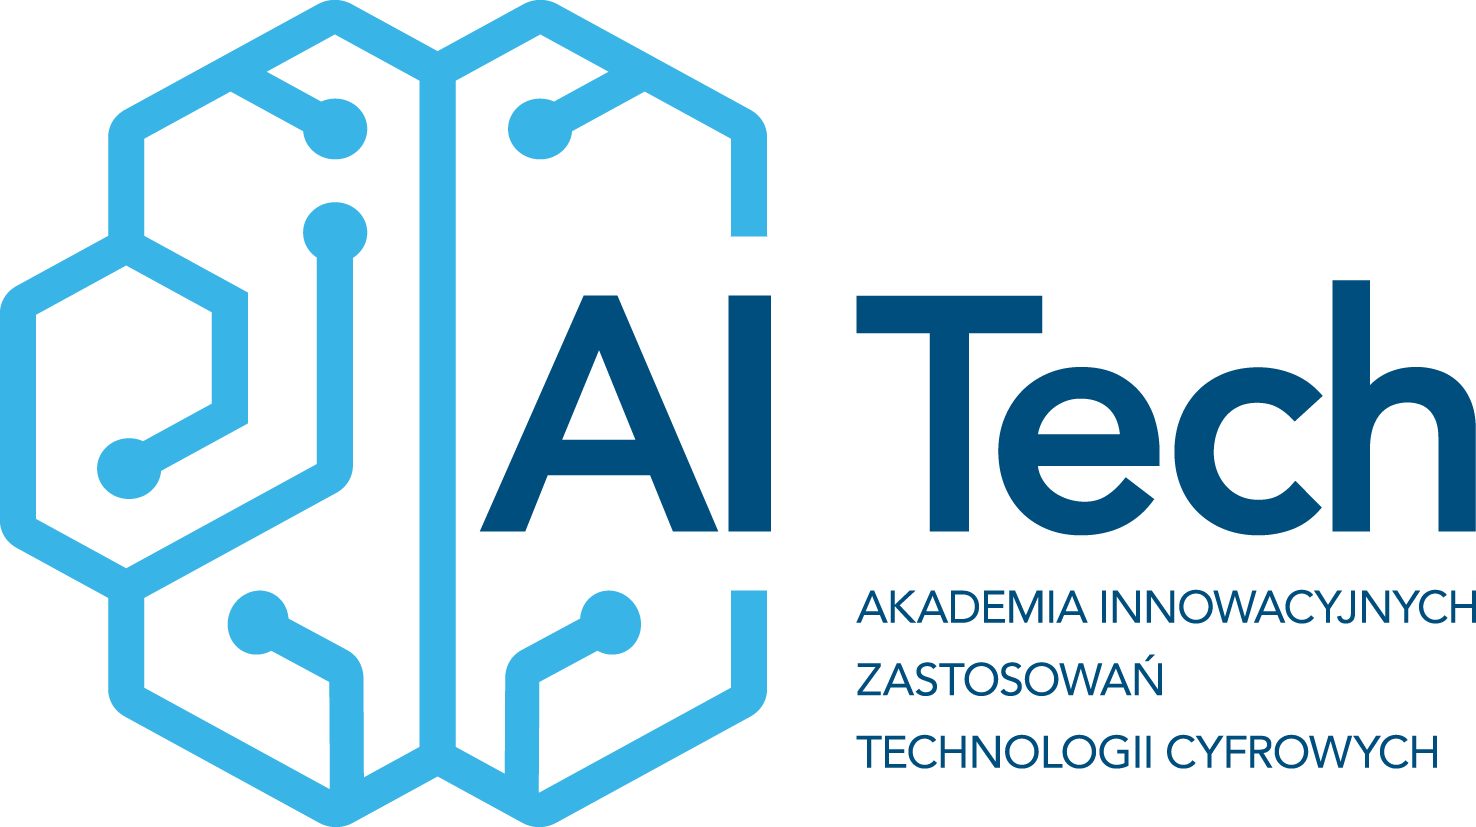



AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
<br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">SKRYPT DO LABORATORIUM</style></h1>
    <h1 style = "font-size:24px">Uczenie głebokie</style></h1>
    <h1 style = "font-size:24px; font-weight:normal">LABORATORIUM 3:</style></h1>
    <h1 style = "font-size:24px">Zastosowanie sieci RNN</style></h1>
    <h1 style = "font-size:24px">Przemysław Rośleń</style></h1>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

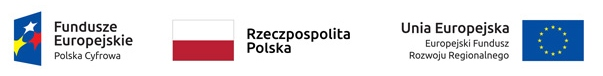

## **1.** Stworzenie sieci rekurencyjnej służącej do klasyfikacji obrazu ( rozpoznawanie pisma odręcznego)

Na początku zaimportujemy niezbędne biblioteki

In [ ]:
!pip3 install torch torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import torchvision
import torchvision.transforms as transforms

Zaimportujemy zbiór danych MNIST, importujemy zbiór treningowy

In [ ]:
# parametety
BATCH_SIZE = 64


transform = transforms.Compose(
    [transforms.ToTensor()])

# pobieranie i ładowanie zbioru treningowego
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)



100%|██████████| 9912422/9912422 [00:00<00:00, 123289211.66it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 4689184.14it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37614577.22it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20116714.64it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**1a.**Zaimportować zbiór testowy analogicznie jak miało to miejsce w przypadku zbioru treningowego

In [ ]:
#tutaj umieść rozwiązanie

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Poniżej zaimplementowano prosty model sieci RNN z wykorzystaniem jednej warstwy rekurencyjnej i jednej w pełni połączonej (FC - Fully Conected)

In [ ]:
# parametety
N_STEPS = 28
N_INPUTS = 28
N_NEURONS = 150
N_OUTPUTS = 10
N_EPOCHS = 10

class ImageRNN(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(ImageRNN, self).__init__()

        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs

        self.basic_rnn = nn.RNN(self.n_inputs, self.n_neurons)

        self.FC = nn.Linear(self.n_neurons, self.n_outputs)

    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons))

    def forward(self, X):
        # transformacja X do wymiarów: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2)

        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()

        # lstm_out => n_steps, batch_size, n_neurons (ukryte stany dla kazdego kroku czasowego)
        # self.hidden => 1, batch_size, n_neurons (finalny stan z każdego lstm_out)
        lstm_out, self.hidden = self.basic_rnn(X, self.hidden)
        out = self.FC(self.hidden)

        return out.view(-1, self.n_outputs) # batch_size X n_output

**1b.**Zaimplementować pokazana powyżej sieć wykorzystując biblotekę  Tensorflow i backend Keras ( tf.keras.Sequential) , wykorzystaj komórki RNN i warstwę w pełni połączoną. Możesz zastosować komórki LSTM, GRU lub zwykłe RNN

In [ ]:
# tutaj umieść rozwiązanie

import tensorflow as tf

def get_keras_model(n_steps, n_inputs, n_neurons, n_outputs):
    return tf.keras.Sequential([
        tf.keras.layers.Input((n_steps, n_inputs)),
        tf.keras.layers.LSTM(n_neurons),
        tf.keras.layers.Dense(n_outputs, activation='softmax'),
    ],
    name='keras_model')

Dobrą praktyką, do której zachęcają developerzy PyTocha jest sprawdzanie modelu zanim zacznie się trening małą ilością danych ze zbioru treningowego. Pozwala to na sprawdzenie czy zgadzają się wymiary i czy na wyjściu modelu znajdują sie wartości, których się spodziewamy.

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
logits = model(images.view(-1, 28,28))
print(logits[0:10])

tensor([[ 0.0301,  0.0455, -0.1041, -0.0035,  0.1961, -0.0500, -0.0261,  0.0622,
         -0.0672, -0.1088],
        [ 0.0314,  0.0386, -0.1254, -0.0252,  0.1979, -0.0387, -0.0155,  0.0940,
         -0.0687, -0.1081],
        [ 0.0246,  0.0398, -0.0913,  0.0165,  0.1992, -0.0644, -0.0295,  0.0782,
         -0.0679, -0.1045],
        [ 0.0238,  0.0429, -0.1104,  0.0115,  0.2063, -0.0475, -0.0330,  0.0758,
         -0.0626, -0.1035],
        [ 0.0257,  0.0446, -0.1249,  0.0014,  0.1959, -0.0234, -0.0443,  0.0788,
         -0.0869, -0.1236],
        [ 0.0311,  0.0452, -0.1062,  0.0017,  0.2031, -0.0425, -0.0243,  0.0728,
         -0.0617, -0.0993],
        [ 0.0218,  0.0429, -0.1043,  0.0146,  0.2065, -0.0495, -0.0336,  0.0837,
         -0.0598, -0.0980],
        [ 0.0209,  0.0432, -0.1111,  0.0073,  0.2063, -0.0495, -0.0381,  0.0776,
         -0.0610, -0.1012],
        [ 0.0205,  0.0425, -0.1078,  0.0096,  0.2107, -0.0484, -0.0363,  0.0799,
         -0.0596, -0.1003],
        [ 0.0205,  

W poniższej komórce specyfikujemy parametry trenignu, wybieramy funkcję straty, optymalizaotr oraz urządzenie, an którym będzie odbywał się trening. Dodatkow zdefinowano funkcję obliczającą dokłądnosć treningu.

In [ ]:
import torch.optim as optim


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Instancja modelu
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

Poniżej przeprowadzany jest właściwy trening:

In [ ]:
for epoch in range(N_EPOCHS):
    train_running_loss = 0.0
    train_acc = 0.0
    model.train()

    # TRENING
    for i, data in enumerate(trainloader):
         # zerowanie parametrów gradientu
        optimizer.zero_grad()

        # reset stanów ukrytych
        model.hidden = model.init_hidden()

        # uzyskanie wartości wejść
        inputs, labels = data
        inputs = inputs.view(-1, 28,28)

        # kork obecny + krok wstecz + optymizacja
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels, BATCH_SIZE)

    model.eval()
    print('Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f'
          %(epoch, train_running_loss / i, train_acc/i))

Epoch:  0 | Loss: 0.7838 | Train Accuracy: 74.35
Epoch:  1 | Loss: 0.3670 | Train Accuracy: 89.40
Epoch:  2 | Loss: 0.2357 | Train Accuracy: 93.31
Epoch:  3 | Loss: 0.1894 | Train Accuracy: 94.69
Epoch:  4 | Loss: 0.1722 | Train Accuracy: 95.18
Epoch:  5 | Loss: 0.1516 | Train Accuracy: 95.78
Epoch:  6 | Loss: 0.1432 | Train Accuracy: 96.08
Epoch:  7 | Loss: 0.1295 | Train Accuracy: 96.43
Epoch:  8 | Loss: 0.1228 | Train Accuracy: 96.57
Epoch:  9 | Loss: 0.1141 | Train Accuracy: 96.86


**1c.** Oblicz accuracy dla zbioru testowego rozwiąznaia zaimplementowanego w PyTorch

In [ ]:
# tutaj umieść rozwiązanie

test_total = 0
test_correct = 0

for data in testloader:
    optimizer.zero_grad()
    with torch.no_grad():
        model.hidden = model.init_hidden()
        inputs, labels = data
        inputs = inputs.view(-1, 28, 28)

        outputs = model(inputs)

        test_total += len(labels)
        test_correct += (torch.max(outputs, 1)[1].view(labels.size()).data == labels.data).sum()

print(f'Test accuracy: {100.0 * test_correct / test_total:.2f} %')


Test accuracy: 96.48 %


**1d.**Dokonaj treningu modelu zaimpelemntowanego w Tensorflow. Porównaj wynik z rozwiazaniem z PyTorch pod względem dokładnosći i czasu treningu. Które bilbioteka spisuje się lepiej?

In [ ]:
# tutaj umieść rozwiązanie

keras_model = get_keras_model(N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
keras_model.summary()

keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x_train = trainset.train_data.numpy()
y_train = trainset.train_labels.numpy()
x_test = testset.test_data.numpy()
y_test = testset.test_labels.numpy()

keras_model.fit(x_train, y_train, epochs=N_EPOCHS)
print(keras_model.evaluate(x_test, y_test))

Model: "keras_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               107400    
                                                                 
 dense (Dense)               (None, 10)                1510      
                                                                 
Total params: 108910 (425.43 KB)
Trainable params: 108910 (425.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.4890 - accuracy: 0.8349
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2869 - accuracy: 0.9033
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2400 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2086 - accuracy: 0.9296
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1878 - accuracy: 0.9368
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1696 - accuracy: 0.9423
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1616 - accuracy: 0.9464
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1444 - accuracy: 0.9511
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1425 - accuracy: 0.9513
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1855

###**Wyniki**
Dla obu bibliotek wyniki są porównywalne. Nieco lepiej sprawdził się PyTorch (3 punkty procentowe większa dokładność).

## **2.** Analiza sentymentu z użyciem sieci RNN

Analizę sentymentu można zdefinować jako automatyczne i półautomatyczne metody analizowania tekstu, których celem jest określenie stanu emocjonalnego jego autora i wpływu, jaki ten tekst może wywrzeć na emocje innych osób.Analiza sentymentu opiera się na rozwiązaniach wypracowanych w dziedzinie przetwarzania języka naturalnego (NLP) czyli między innymi na sieciach RNN - najczęściej LSTM.

Wykorzystamy dataset IMDb wbudowany w bibliotekę Keras - jest to zbiór ocen filmów w serwisie IMDb i zawiera opinie zarówno pozytywne i negatwyne, wszystkie o różnej długości, co jest istotne z punktu widzenia implementacji systemu do analizy sentymentu - należy na to zwrocić uwagę podczas trwania laboratorium

In [ ]:
from keras.datasets import imdb

Ustawmy rozmiar słownika na 5000 i dokonajmy podziału danych na zbiory testowy i treningowy

In [ ]:

vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17464789/17464789 [==============================] - 0s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


**2a.** Wyprintuj dowolny element ze zbioru treningowego i etykietę - co oznaczają wypisane liczby?

In [ ]:
# tutaj umieść rozwiązanie

print(f'Element: {X_train[0]}')
print(f'Etykieta: {y_train[0]}')

Element: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
Etykieta: 1


// A tutaj odpowiedź słowną

Zbiór liczb to recenzja filmu zakodowana jako indeksy do słownika. Dana liczba oznacza nr danego słowa w słowniku (od najpopularniejszych). 0 to pad token.
Etykieta 1 oznacza pozytywną opinię.

Zaimportujmy słownik pozwalający na rozszyfrowanie co znajduje się pod liczbami wyprintowanymi powyżej

In [ ]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}


1641221/1641221 [==============================] - 0s 0us/step


**2b.**
Korzystając z poniżej podpowiedzi jak obsłużyć słownik wyprintuj kilka przykładowych recenzji:
<br>
*Podpowiedź:*
<br>
`[id2word.get(i, ' ') for i in X_train[Z]]`

In [ ]:
# tutaj umieść rozwiązanie

for Z in range(10):
  print([id2word.get(i, ' ') for i in X_train[Z]])

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 'they'

**2c.**  Sprawdź maksymalną i minimalną długość recenzji w obu całym datasecie (trenigowy i testowy razem)

In [ ]:
# tutaj umieść rozwiązanie

min_amount = 1000000
max_amount = 0

for dataset in [X_train, X_test]:
  for review in dataset:
    length = len([id2word.get(i, ' ') for i in review])
    min_amount = min(length, min_amount)
    max_amount = max(length, max_amount)

print(f'Minimum: {min_amount}')
print(f'Maximum: {max_amount}')

Minimum: 7
Maximum: 2494


Aby moć wpuścić dane do naszego modelu RNN konieczne jest ustalenie jednakowej długości dla każdego wejscia. W tym celu ustalony zostanie limit słów - `max_words` i wykorzysatna funckja `pad_sequences` z Kersa. Jeżeli wejście będzie krótsze niż limit znaków zostanie automatycznie uzupełnione zerami, aby spełniać limit.
<br>
**2d.** Ustaw wartość zmiennej `max_words` bazując na zadaniu **2c**

In [ ]:
from keras.preprocessing import sequence
max_words = max_amount # umieśc wartość bazując na zadaniu 2c
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

Poniżej zadeklarujemy model.
<br>
**2e**. Doddaj do modelu warstwy

*   *Embedding* zależną od rozmiaru słownika, rozmiaru embeddingów oraz z wielkością wejścia rowną zmiennej max_words
*   *LSTM* z wartościa komórek równą 100
* *Dense* z jedną jendostką i sigmoidalną funkcją aktywacji







In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense ## miejsce na rozwiązanie
embedding_size=32
model=Sequential([
    Embedding(vocabulary_size, 100, input_length=max_words),
    LSTM(100),
    Dense(1, activation='sigmoid'),
])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 2494, 100)         500000    
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 580501 (2.21 MB)
Trainable params: 580501 (2.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Poniżej dokonujemy kompilacji modelu z użyciem binarnej entorpii krzyżowej jako funkcji straty oraz opytmalizatora ADAM:

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Dokonujemy krótkiego treningu zadeklarowanej sieci:

In [ ]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/3
390/390 [==============================] - 64s 159ms/step - loss: 0.4371 - accuracy: 0.7929 - val_loss: 0.2671 - val_accuracy: 0.9062
Epoch 2/3
390/390 [==============================] - 48s 123ms/step - loss: 0.4610 - accuracy: 0.7796 - val_loss: 0.6753 - val_accuracy: 0.5781
Epoch 3/3
390/390 [==============================] - 42s 107ms/step - loss: 0.3896 - accuracy: 0.8261 - val_loss: 0.2232 - val_accuracy: 0.9531


**2f**. Sprawdź wynik modelu na danych testowych

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# tutaj umieść rozwiązanie
print(model.evaluate(X_test, y_test))

y_pred = model.predict(X_test)

y_pred_binary = np.round(y_pred)

precision = precision_score(y_test, y_pred_binary, average='binary')
recall = recall_score(y_test, y_pred_binary, average='binary')
f1 = f1_score(y_test, y_pred_binary, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

782/782 [==============================] - 26s 32ms/step - loss: 0.3391 - accuracy: 0.8607
[0.339116632938385, 0.8607199788093567]
782/782 [==============================] - 26s 33ms/step
Precision: 0.8689852700490999
Recall: 0.84952
F1 Score: 0.8591423948220065


###**Wyniki**

Wytrenowany model osiągnął ponad 86% dokładności na zbiorze testowym, co jest zadowalającym wynikiem. Wartości precision, recall i f1 potwierdzają poprawne działanie modelu.

# 3. Forma i zawartość sprawozdania

Sprawozdanie powinno zawierać kopie ekranu stworzonych kodów i wyników ich działania dla zadań, które w instrukcji zostały oznaczone kolorem zielonym oraz stosowne komentarze, jeśli zadanie tego wymaga. Dokument powinien zostać przesłany na serwer wskazany przez prowadzącego ćwiczenie w formacie PDF.  

# Dodatki